# Installations

In [49]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [50]:
advertising = pd.read_csv('advertising.csv')
advertising = advertising.drop('Unnamed: 0', axis=1)

# EDA

In [51]:
print(f'Rows: {len(advertising)}')
print(f'Columns: {advertising.shape[1]}')
print(f'Missing values: \n{advertising.isnull().sum()}')
advertising.head()

Rows: 200
Columns: 4
Missing values: 
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [52]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Full Model

In [53]:
full_model =smf.ols('Sales ~ TV + Radio + Newspaper', data=advertising).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        12:20:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check Assumptions

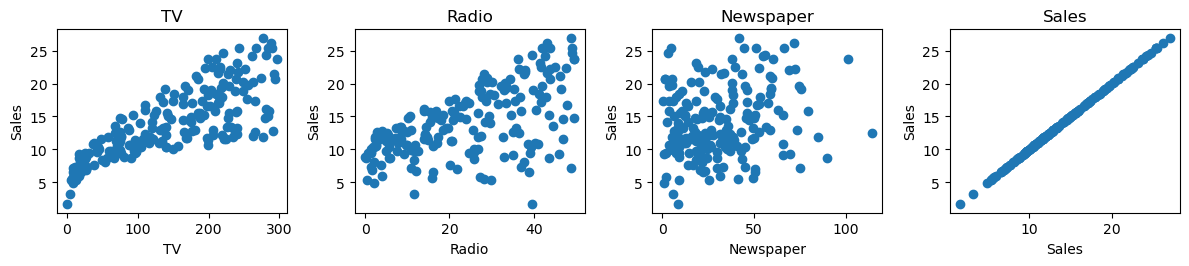

In [58]:
# Linearity between response and predictors
response = 'Sales'

plt.figure(figsize=(12, 12))
for i, col in enumerate(advertising.columns):
    plt.subplot(5, 4, i+1)
    x = advertising[col]
    y = advertising['Sales']
    plt.plot(x, y, 'o')
    plt.tight_layout()

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Sales')